In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

import seaborn as sns

In [2]:
datasetIndex = 2

if datasetIndex == 1:
    dataSetPath = r"E:\HiTech\CS 429 Introduction to Data Science\Lab\new_insurance_data.csv"
elif datasetIndex == 2:
    dataSetPath = r"E:\HiTech\CS 429 Introduction to Data Science\Lab\googleplaystore.csv"


dataset = pd.read_csv(dataSetPath)
dataset.head()

print(dataset.columns)

print(f"Dataset Shape: {dataset.shape}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Dataset Shape: (10841, 13)


In [3]:
dataset.drop_duplicates(inplace=True)
print(f"Dataset Shape after removing duplcates: {dataset.shape}")

Dataset Shape after removing duplcates: (10358, 13)


In [4]:
# Step 2: Handle missing values (remove rows with missing values)
cleanedDataset = dataset.dropna()

# Step 3: Remove duplicates
cleanedDataset = cleanedDataset.drop_duplicates()
print(f"number of Rows after removing empty cells rows: {cleanedDataset.shape[0]}")

number of Rows after removing empty cells rows: 8886


In [5]:
# Save cleaned data
cleanedDataset.to_csv(f'cleaned_Dataset_with_Categorical_Features_index_{datasetIndex}.csv', index=False)

In [ ]:
# Step 4: Encode categorical variables (using label encoding as an example)
for col in cleanedDataset.select_dtypes(include=['object']).columns:
    cleanedDataset[col] = cleanedDataset[col].astype('category').cat.codes

 
print(f"Total Rows:{cleanedDataset.shape[0]} and Columns: {cleanedDataset.shape[1]}")

In [6]:
for x in cleanedDataset.columns:
  cleanedDataset[x] = cleanedDataset[x].astype(float)

In [7]:
# Save cleaned data
cleanedDataset.to_csv(f'cleaned_Dataset_index_{datasetIndex}.csv', index=False)

In [ ]:
print(cleanedDataset.columns) 
selected_columns = ['Rating', 'Reviews', 'Installs']   
newDataset = cleanedDataset[selected_columns]

print(f"New Rows:{newDataset.shape[0]} and Columns: {newDataset.shape[1]}")


In [ ]:
correlation_matrix = newDataset.corr()

correlation_values = correlation_matrix.abs()
sorted_correlation = correlation_values.unstack().sort_values(ascending=False)
sorted_correlation = sorted_correlation[sorted_correlation != 1.0]
 
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Set the title of the plot
plt.title('Correlation Heatmap ' ,fontsize=16, fontweight='bold')
plt.show()
plt.close()






In [ ]:
threshold = 4

# Step 3: Select columns that have unique values less than the threshold
selected_columns = cleanedDataset.columns[cleanedDataset.nunique() < threshold]

# Step 4: Display the selected columns
print("Columns with unique values less than", threshold, ":")
print(selected_columns)

# If you want to select those specific columns from the dataset:
df_selected = cleanedDataset[selected_columns]

# Step 5: Display the filtered DataFrame with selected columns
print(df_selected.head())

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Data for the pie chart
labels = ['Category A', 'Category B', 'Category C', 'Category D']
sizes = [30, 20, 25, 25]  # Proportions (should add up to 100 or the total)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Optional: Define colors for each slice

# Step 2: Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Step 3: Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')  

# Step 4: Display the pie chart
plt.title("Distribution of Categories")
plt.show()

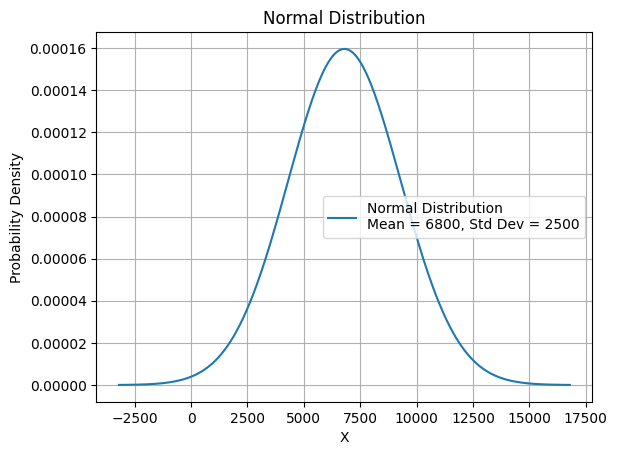

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation
mean = 6800  # example mean
std_dev = 2500  # example standard deviation

# Generate x values (the range of values)
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)

# Calculate the y values for the normal distribution
y = norm.pdf(x, mean, std_dev)

# Plotting
plt.plot(x, y, label=f"Normal Distribution\nMean = {mean}, Std Dev = {std_dev}")
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.legend()
plt.grid(True)
plt.show()


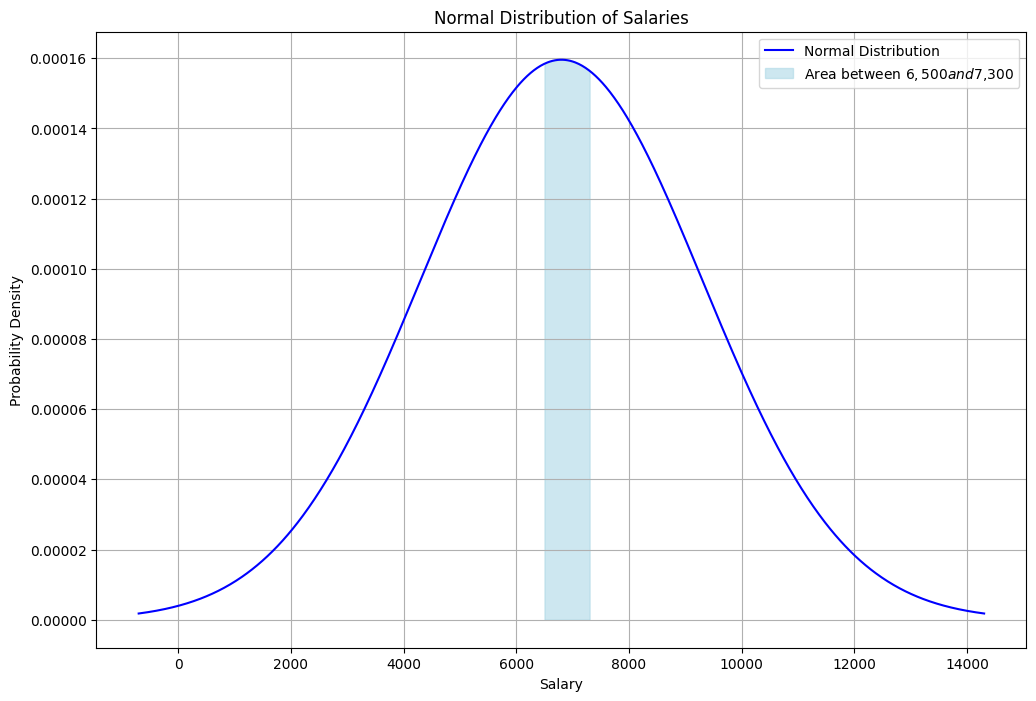

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given mean and standard deviation
mean = 6800
std_dev = 2500

# Define the range for x-values (salary values)
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calculate the normal distribution curve
y = norm.pdf(x, (mean), (std_dev))

plt.figure(figsize=(12, 8))
# Plot the normal distribution curve
plt.plot(x, y, label="Normal Distribution", color='blue')

# Define the range between $6,500 and $7,300
x_fill = np.linspace(6500, 7300, 1000)
y_fill = norm.pdf(x_fill, mean, (std_dev))

# Fill the area between $6,500 and $7,300
plt.fill_between(x_fill, y_fill, color="lightblue", alpha=0.6, label="Area between $6,500  and  $7,300")

# Labeling
plt.xlabel("Salary")
plt.ylabel("Probability Density")
plt.title("Normal Distribution of Salaries")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


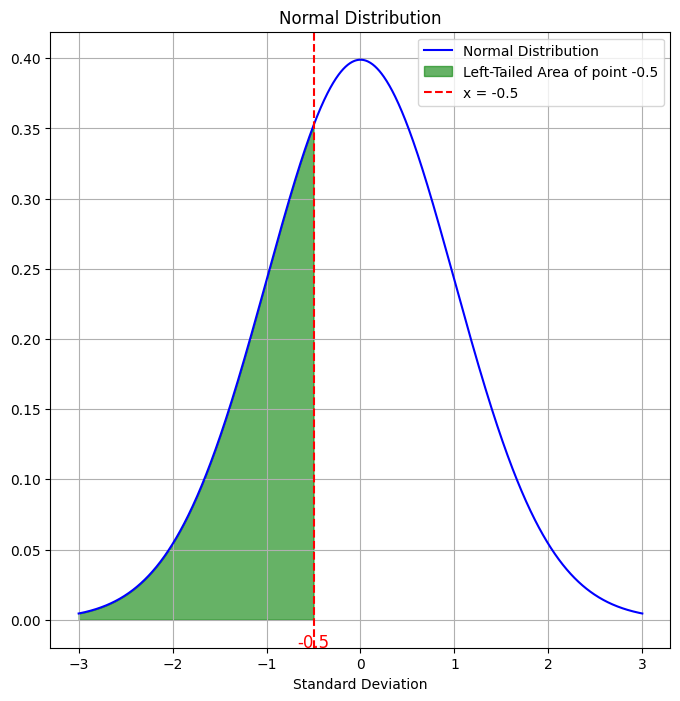

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Given mean and standard deviation
mean = 0
std_dev = 1

# Define the range for x-values
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calculate the normal distribution curve
y = norm.pdf(x, mean, std_dev)

plt.figure(figsize=(8, 8))
# Plot the normal distribution curve
plt.plot(x, y, label="Normal Distribution", color='blue')

# Define the range for the shaded left-tailed area
x_fill = np.linspace(-3, -0.5, 1000)
y_fill = norm.pdf(x_fill, mean, std_dev)

# Fill the left-tailed area up to x = -0.5
plt.fill_between(x_fill, y_fill, color="green", alpha=0.6, label="Left-Tailed Area of point -0.5")

# Plot the vertical line at x = -0.5
plt.axvline(x=-0.5, color='red', linestyle='--', linewidth=1.5, label="x = -0.5")

# Add a label at the x-axis for x = -0.5
plt.text(-0.5, -0.02, '-0.5', ha='center', color='red', fontsize=12)

# Labeling
plt.xlabel("Standard Deviation") 
plt.title("Normal Distribution")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


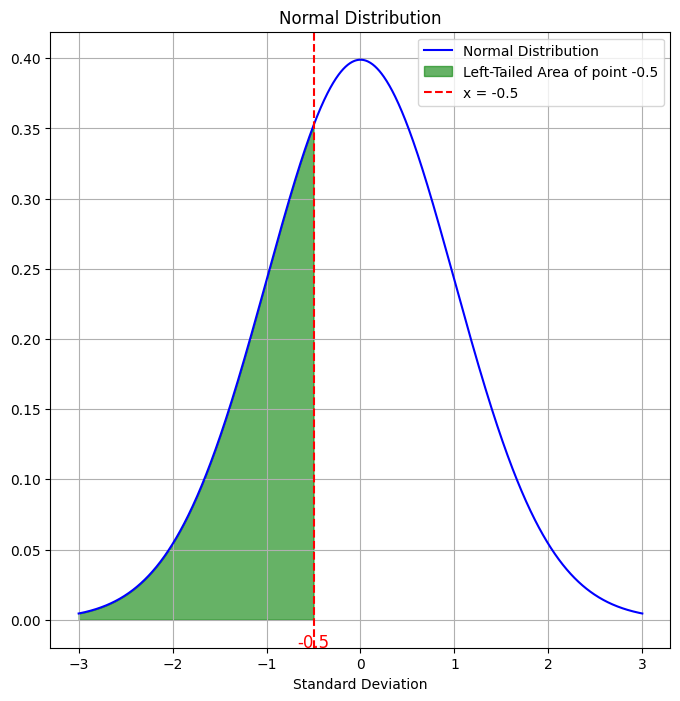

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean = 0
std_dev = 1
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Normal Distribution", color='blue')
# Define the range for the shaded left-tailed area
x_fill = np.linspace(-3, -0.5, 1000)
y_fill = norm.pdf(x_fill, mean, std_dev)
# Fill the left-tailed area up to x = -0.5
plt.fill_between(x_fill, y_fill, color="green", alpha=0.6, label="Left-Tailed Area of point -0.5")
plt.axvline(x=-0.5, color='red', linestyle='--', linewidth=1.5, label="x = -0.5")
plt.text(-0.5, -0.02, '-0.5', ha='center', color='red', fontsize=12)

plt.xlabel("Standard Deviation") 
plt.title("Normal Distribution")
plt.legend()

plt.grid(True)
plt.show()


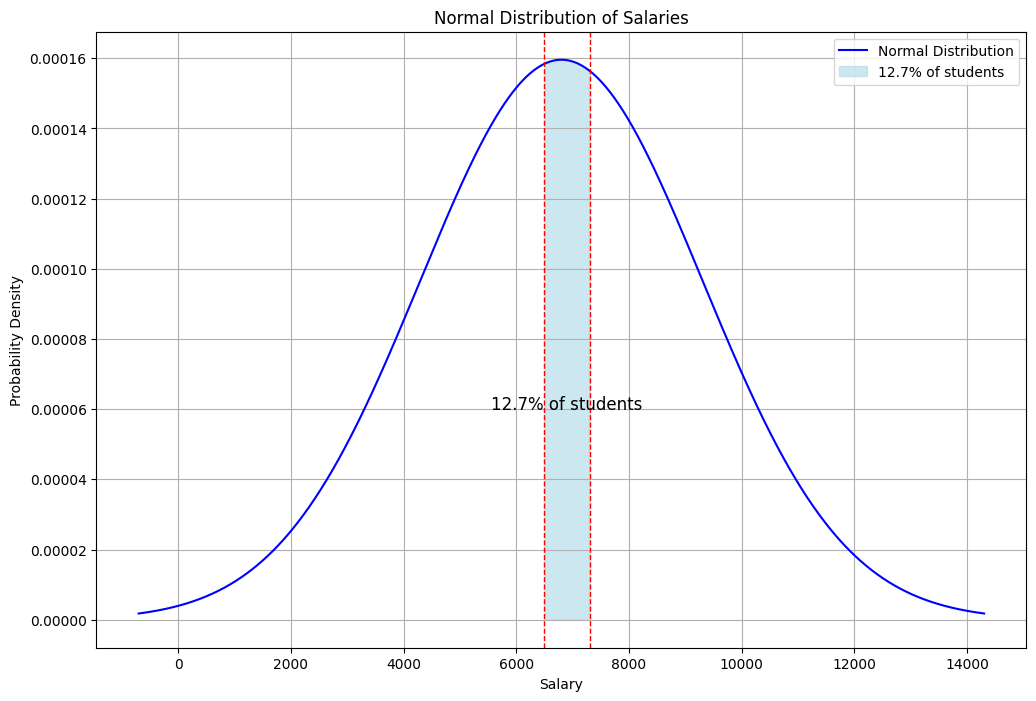

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
mean = 6800
std_dev = 2500
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)
plt.figure(figsize=(12, 8))
plt.plot(x, y, label="Normal Distribution", color='blue')
x_fill = np.linspace(6500, 7300, 1000)
y_fill = norm.pdf(x_fill, mean, std_dev)
plt.fill_between(x_fill, y_fill, color="lightblue", alpha=0.6, label="12.7% of students")
plt.axvline(6500, color='red', linestyle='--', linewidth=1)
plt.axvline(7300, color='red', linestyle='--', linewidth=1)
plt.text(6900, 0.00006, "12.7% of students", color="black", fontsize=12, ha="center")
plt.xlabel("Salary")
plt.ylabel("Probability Density")
plt.title("Normal Distribution of Salaries")
plt.legend()
plt.grid(True)
plt.show()


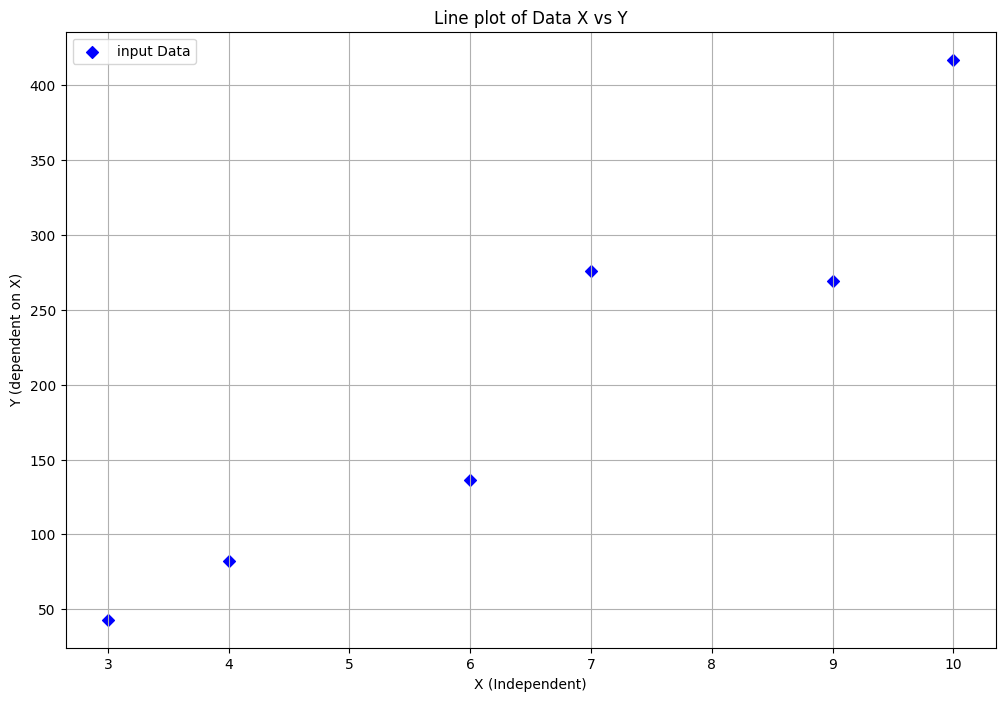

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = [7, 3, 4, 6, 10, 9 ] 
y1 = [276, 43, 82, 136, 417, 269] 

 
plt.figure(figsize=(12, 8))

plt.scatter(x, y1, color='blue', marker='D', label='input Data') 

plt.title('Line plot of Data X vs Y')
plt.xlabel('X (Independent)')
plt.ylabel('Y (dependent on X)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


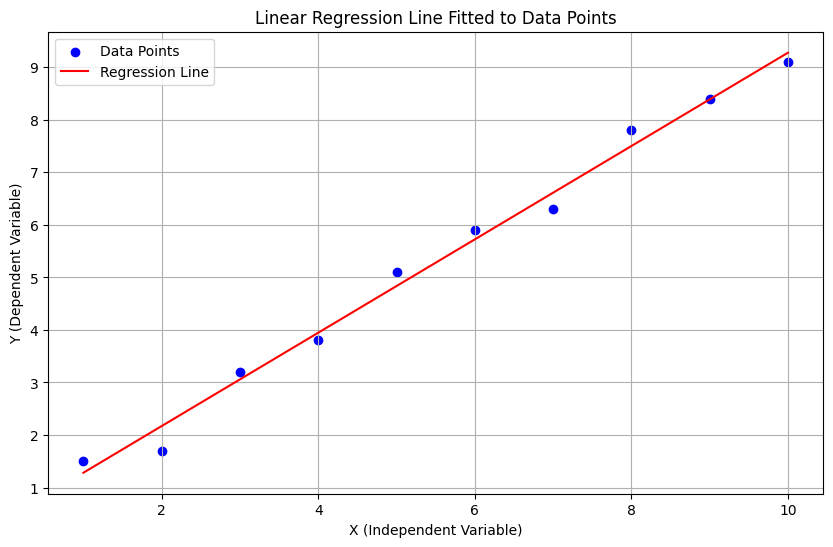

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: points for X (independent variable) and Y (dependent variable)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([1.5, 1.7, 3.2, 3.8, 5.1, 5.9, 6.3, 7.8, 8.4, 9.1])

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, Y)

# Generate predictions (the regression line)
Y_pred = model.predict(X)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Data Points")

# Plot the regression line
plt.plot(X, Y_pred, color="red", label="Regression Line")

# Labeling
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Linear Regression Line Fitted to Data Points")
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


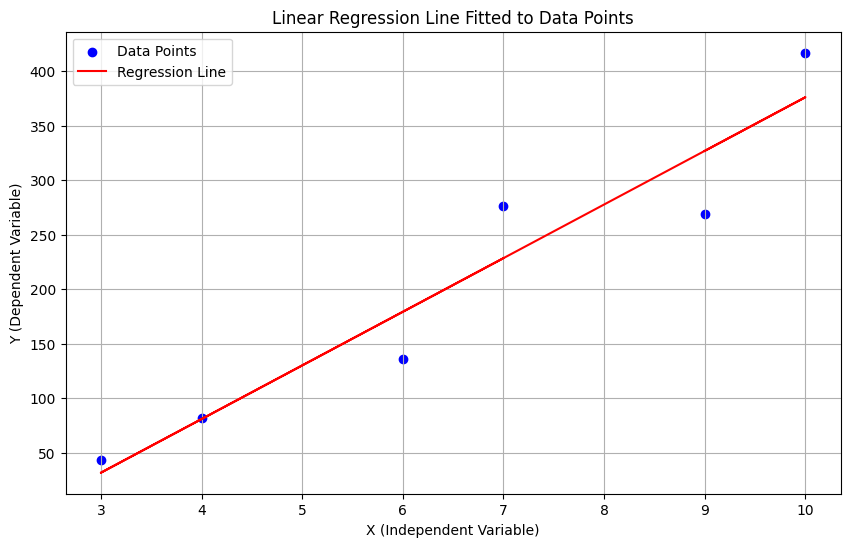

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([7, 3, 4, 6, 10, 9]).reshape(-1, 1)  # Reshape for sklearn
Y = np.array([276, 43, 82, 136, 417, 269])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Data Points")
# Plot the regression line
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Linear Regression Line Fitted to Data Points")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X2 = np.array([7, 3, 4, 6, 10, 9, 12, 17, 21]).reshape(-1, 1)  # Reshape for sklearn 
Y_pred = model.predict(X2)

print(len(X2))
print(len(Y_pred))
plt.figure(figsize=(10, 6))
plt.scatter(X2[:len(Y)], Y, color="blue", label="Data Points")
# Plot the regression line
plt.plot(X2, Y_pred, color="red", label="Regression Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Linear Regression Line Fitted to Data Points")
plt.legend()
plt.grid(True)
plt.show()

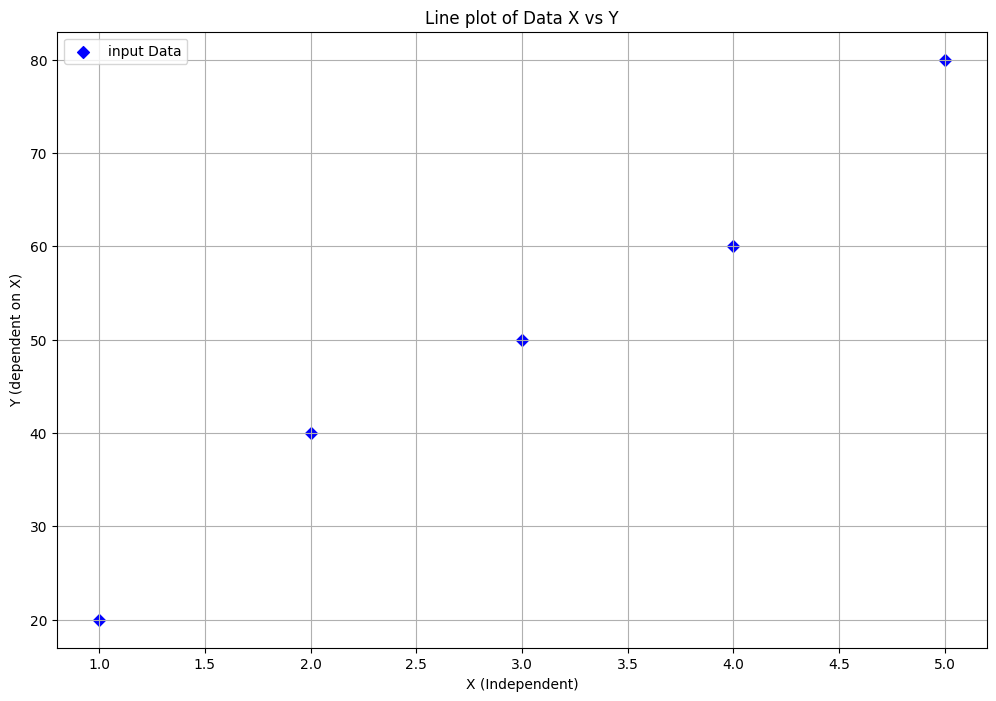

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5 ] 
y1 = [20, 40, 50, 60, 80]  

 
plt.figure(figsize=(12, 8))

plt.scatter(x, y1, color='blue', marker='D', label='input Data') 

plt.title('Line plot of Data X vs Y')
plt.xlabel('X (Independent)')
plt.ylabel('Y (dependent on X)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


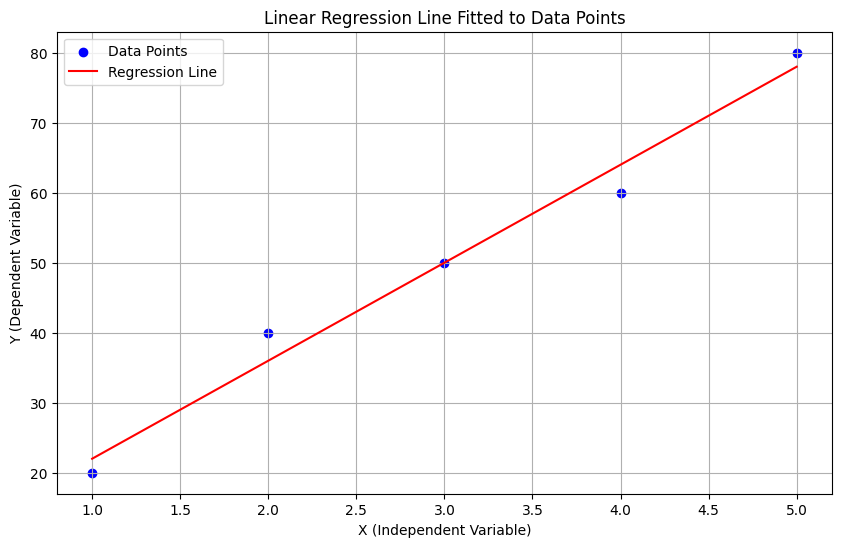

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5 ]).reshape(-1, 1)  # Reshape for sklearn 
Y = np.array([20, 40, 50, 60, 80])


model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Data Points")
# Plot the regression line
plt.plot(X, Y_pred, color="red", label="Regression Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Linear Regression Line Fitted to Data Points")
plt.legend()
plt.grid(True)
plt.show()


11
11


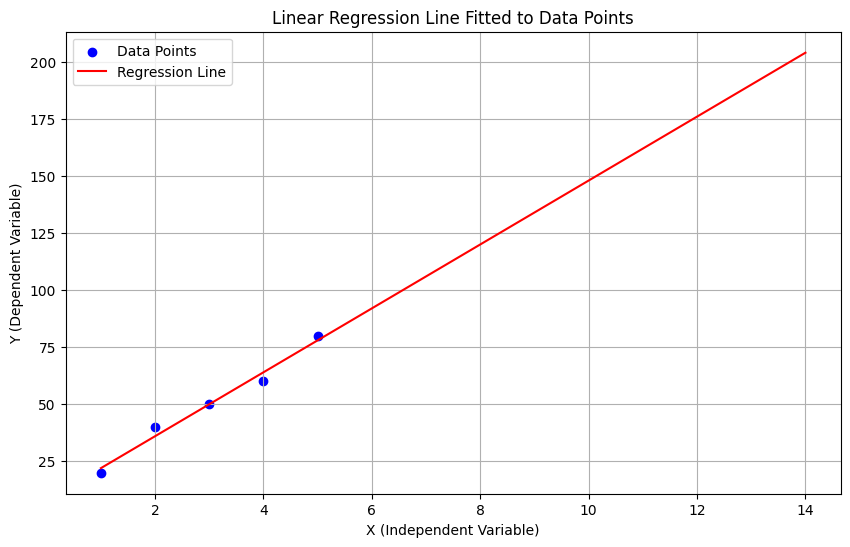

In [ ]:
X2 = np.array([1, 2, 3, 4, 5 , 6, 7, 8, 9, 10, 14 ]).reshape(-1, 1)  # Reshape for sklearn 
Y_pred = model.predict(X2)

print(len(X2))
print(len(Y_pred))
plt.figure(figsize=(10, 6))
plt.scatter(X2[:len(Y)], Y, color="blue", label="Data Points")
# Plot the regression line
plt.plot(X2, Y_pred, color="red", label="Regression Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Linear Regression Line Fitted to Data Points")
plt.legend()
plt.grid(True)
plt.show()